In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy

In [17]:
numX = 4
numY = 3
numZ = 2

density3D = np.zeros((numZ, numX, numY)) # stack, row, column
density2D = np.ones((11, 11))
xlist = np.linspace(0, 10, 11)
ylist = np.linspace(0, 10, 11)
box = np.zeros((100, 100, 100))


In [85]:
def drawFibril(radius):
    a_theta = random.uniform(0, 90)
    a_phi   = random.uniform(0, 90)

    v_dir = np.zeros(3)
    v_dir[0] = np.cos(a_theta)
    v_dir[1] = np.sin(a_theta) * np.sin(a_phi)
    v_dir[2] = np.sin(a_theta) * np.cos(a_phi)


    print(v_dir)

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot_surface'

-0.8390715290764524

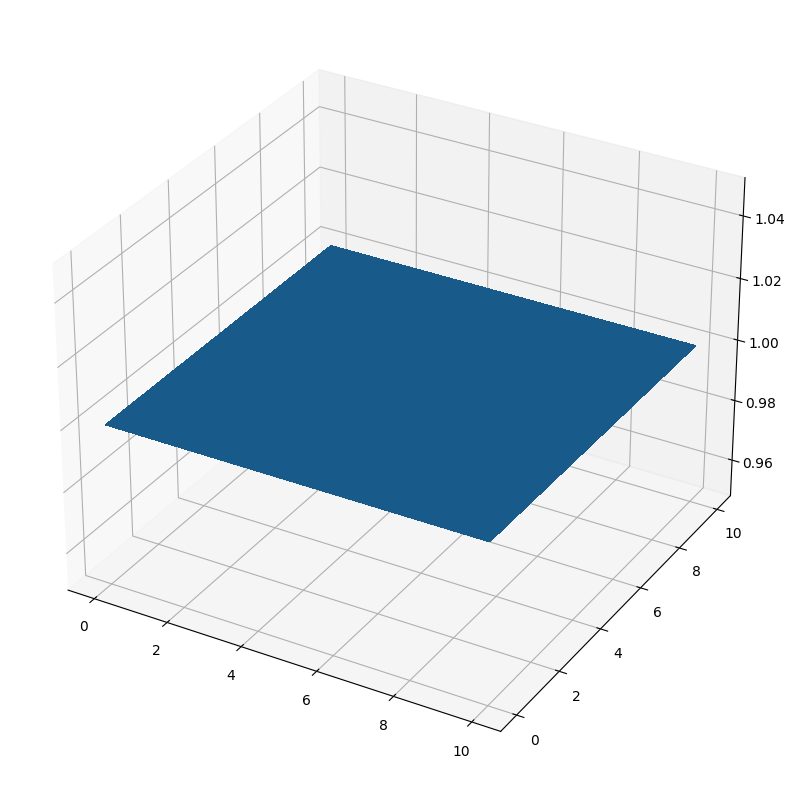

In [20]:
fig = plt.figure(figsize=(10,10), dpi=100)
ha = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(xlist, ylist, indexing='xy')

# density = gaussian_filter(model.density, 2)
ha.plot_surface(X, Y, density2D, linewidth=0, antialiased=False)


In [ ]:

length = 1  # Length of the cylinder
N = 128  # Number of vertices along midline
N_theta = 32  # Number of rotation angles
r_max = 0.02  # Maximum radius
N_taper = int(N / 4)  # Number of points to taper at the ends
shape_k1 = 1.5  # Changes shape at midpoint
shape_k2 = 1  # Changes shape at endpoint
u = np.linspace(0, length, N)
theta = np.linspace(0, 2 * np.pi, N_theta)

# Midline as straight line
X = np.stack([u, np.zeros_like(u), np.zeros_like(u)], axis=-1)

# Midline as a spiral
X = np.zeros((N, 3))
X[:, 0] = np.sin(2 * np.pi * u) / 10
X[:, 1] = np.cos(2 * np.pi * u) / 10
X[:, 2] = np.linspace(1 / np.sqrt(3), 0, N)

# Define the radius as a function of midline
s = np.linspace(0, np.pi / 2, N_taper)
x = N_taper * np.cos(s)**shape_k1
y = r_max * np.sin(s)**shape_k2
t_idxs = np.linspace(0, N_taper, N_taper)

# Resample to get equally spaced points
f = interp1d(x, y, kind='cubic', fill_value='extrapolate')
slopes = f(t_idxs)
r = np.concatenate([
    slopes[::-1],
    np.ones(N - 2 * N_taper) * r_max,
    slopes
])

# Calculate a TNB frame from the midline
T = normalise(np.gradient(X, axis=0))
N = normalise(np.cross(T, np.ones_like(T) * [0, 0, 1]))
B = np.cross(T, N)

# Generate surface
x = X[:, 0] + r * (np.outer(np.cos(theta), N[:, 0]) + np.outer(np.sin(theta), B[:, 0]))
y = X[:, 1] + r * (np.outer(np.cos(theta), N[:, 1]) + np.outer(np.sin(theta), B[:, 1]))
z = X[:, 2] + r * (np.outer(np.cos(theta), N[:, 2]) + np.outer(np.sin(theta), B[:, 2]))

# (Also equivalent to):
surface = X + r[None, :, None] \
              * (np.einsum('i,jk->ijk', np.cos(theta), N) + np.einsum('i,jk->ijk', np.sin(theta), B))
x, y, z = surface[..., 0], surface[..., 1], surface[..., 2]

ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
plt.show()
